In [11]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import pandas as pd

fromage = pd.read_table(r"fromage.txt", sep="\t", header=0, index_col=0)
print(fromage.describe())

         calories      sodium     calcium    lipides     retinol    folates  \
count   29.000000   29.000000   29.000000  29.000000   29.000000  29.000000   
mean   300.034483  210.086207  185.734483  24.158621   67.562069  13.010345   
std     91.914356  108.678923   72.528882   8.129642   24.163098  11.723339   
min     70.000000   22.000000   72.600000   3.400000   37.100000   1.200000   
25%    292.000000  140.000000  132.900000  23.400000   51.600000   4.900000   
50%    321.000000  223.000000  202.300000  26.300000   62.300000   6.400000   
75%    355.000000  276.000000  220.500000  29.100000   76.400000  21.100000   
max    406.000000  432.000000  334.600000  33.300000  150.500000  36.400000   

       proteines  cholesterol  magnesium  
count  29.000000    29.000000  29.000000  
mean   20.168966    74.586207  26.965517  
std     6.959788    28.245755  11.318388  
min     4.100000    10.000000  10.000000  
25%    17.800000    70.000000  20.000000  
50%    21.000000    80.000000 

In [2]:
fromage.dtypes

calories         int64
sodium         float64
calcium        float64
lipides        float64
retinol        float64
folates        float64
proteines      float64
cholesterol      int64
magnesium        int64
dtype: object

<AxesSubplot:>

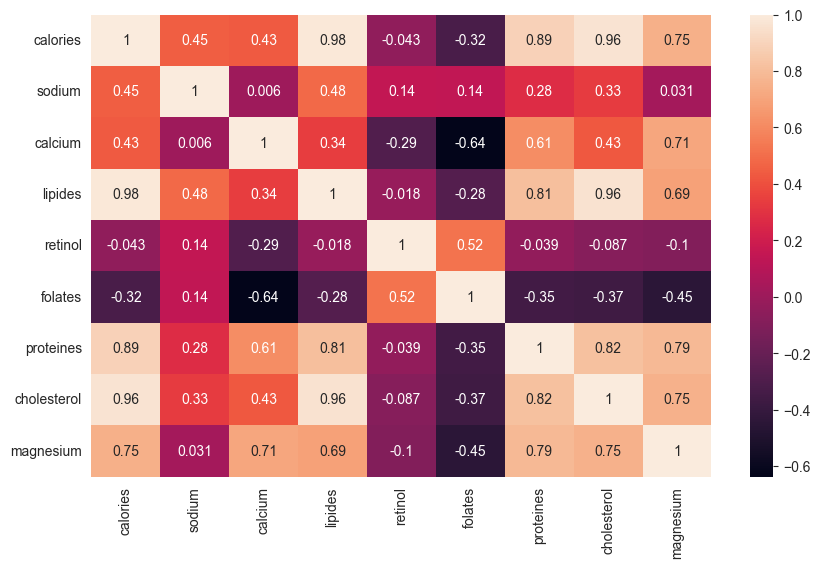

In [3]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(fromage.corr(), annot=True)

##### Comment sont réparties les données :
29 different instances , 9 continuous features
#####  Quels sont les attributs de ce jeu de données :
'calories', 'sodium', 'calcium', 'lipides', 'retinol', 'folates', 'proteines', 'cholesterol', 'magnesium'


array([[<AxesSubplot:xlabel='calories', ylabel='calories'>,
        <AxesSubplot:xlabel='sodium', ylabel='calories'>,
        <AxesSubplot:xlabel='calcium', ylabel='calories'>,
        <AxesSubplot:xlabel='lipides', ylabel='calories'>,
        <AxesSubplot:xlabel='retinol', ylabel='calories'>,
        <AxesSubplot:xlabel='folates', ylabel='calories'>,
        <AxesSubplot:xlabel='proteines', ylabel='calories'>,
        <AxesSubplot:xlabel='cholesterol', ylabel='calories'>,
        <AxesSubplot:xlabel='magnesium', ylabel='calories'>],
       [<AxesSubplot:xlabel='calories', ylabel='sodium'>,
        <AxesSubplot:xlabel='sodium', ylabel='sodium'>,
        <AxesSubplot:xlabel='calcium', ylabel='sodium'>,
        <AxesSubplot:xlabel='lipides', ylabel='sodium'>,
        <AxesSubplot:xlabel='retinol', ylabel='sodium'>,
        <AxesSubplot:xlabel='folates', ylabel='sodium'>,
        <AxesSubplot:xlabel='proteines', ylabel='sodium'>,
        <AxesSubplot:xlabel='cholesterol', ylabel='sodium'>

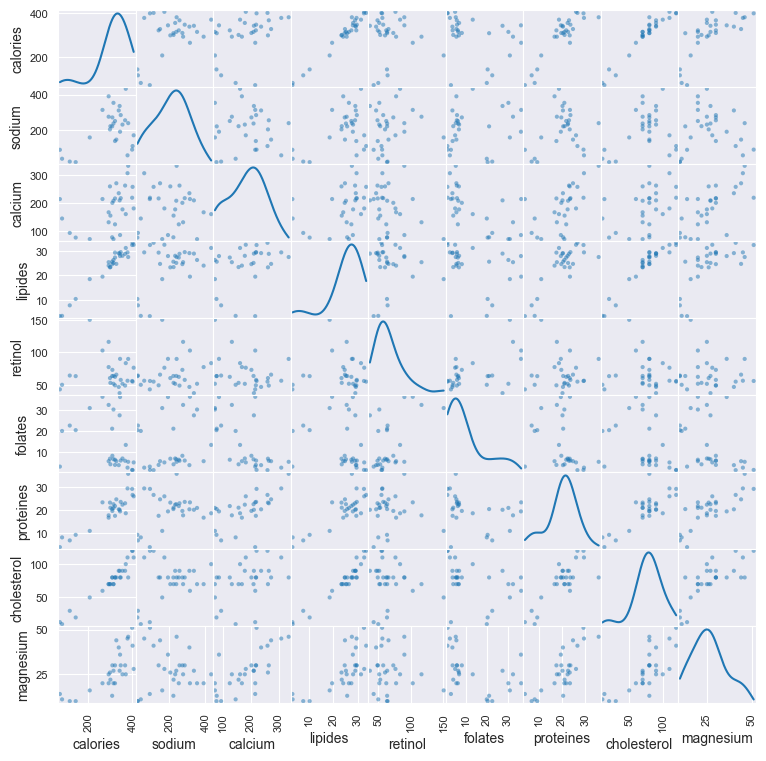

In [4]:
pd.plotting.scatter_matrix(fromage, figsize=(9, 9), diagonal='kde')

###### pandas_profiling.profilereport() | ydata_profiling.profilereport()

In [5]:
from sklearn.cluster import KMeans
import numpy as np

np.random.seed(0)
# By default , 8 n_clusters = 8
kmeans = KMeans(n_clusters=5)
kmeans.fit(fromage)
# Returns the indices that would sort an array
idk = np.argsort(kmeans.labels_)
print(pd.DataFrame(fromage.index[idk], kmeans.labels_[idk]))
# Transform X to a cluster-distance space. In the new space, each dimension is the distance to the cluster centers.
print(kmeans.transform(fromage))

             Fromages
0            Emmental
0            Beaufort
0            Vacherin
0             Cheddar
0               Comte
0                Edam
1           Reblochon
1            Pyrenees
1            Parmesan
1             Morbier
1           Maroilles
1         SaintPaulin
1              Cantal
1           Camembert
1                Bleu
1             Babybel
2      Fr.frais20nat.
2      Fr.frais40nat.
2       Petitsuisse40
2  Yaourtlaitent.nat.
3                Tome
3  Fr.chevrepatemolle
3            Chaource
3           Chabichou
3         PontlEveque
3         Coulomniers
4         CarredelEst
4          Rocquefort
4         Fr.fondu.45
[[298.50120835 184.40132646 384.27301005 144.19668281  78.00828304]
 [139.99964782  44.16198818 303.10311983 108.34460454 172.57012745]
 [ 38.57004091 179.08848428 349.91323389 223.82195305 319.72032918]
 [223.14028784  78.60472759 393.76898843 170.32549232 103.33609674]
 [234.87900727  98.30040285 332.43471728 147.16299354 135.59472294]


C:\Users\Lenovo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"


<AxesSubplot:>

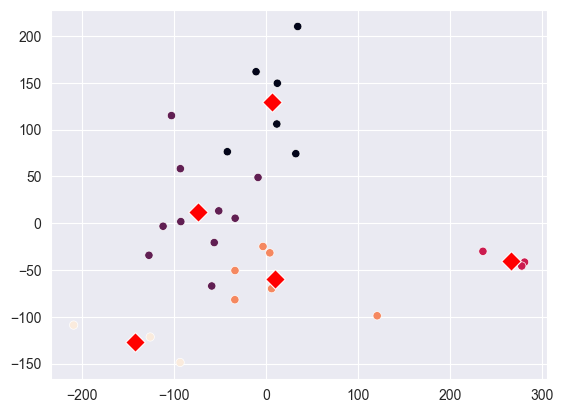

In [6]:
from sklearn.decomposition import PCA

dim_red = PCA(n_components=2)
reducted_fromage = dim_red.fit_transform(fromage)
centers = dim_red.transform(kmeans.cluster_centers_)
sns.scatterplot(x=reducted_fromage[:, 0], y=reducted_fromage[:, 1], c=kmeans.labels_)
sns.scatterplot(x=centers[:, 0], y=centers[:, 1], c='r', marker='D', s=100)

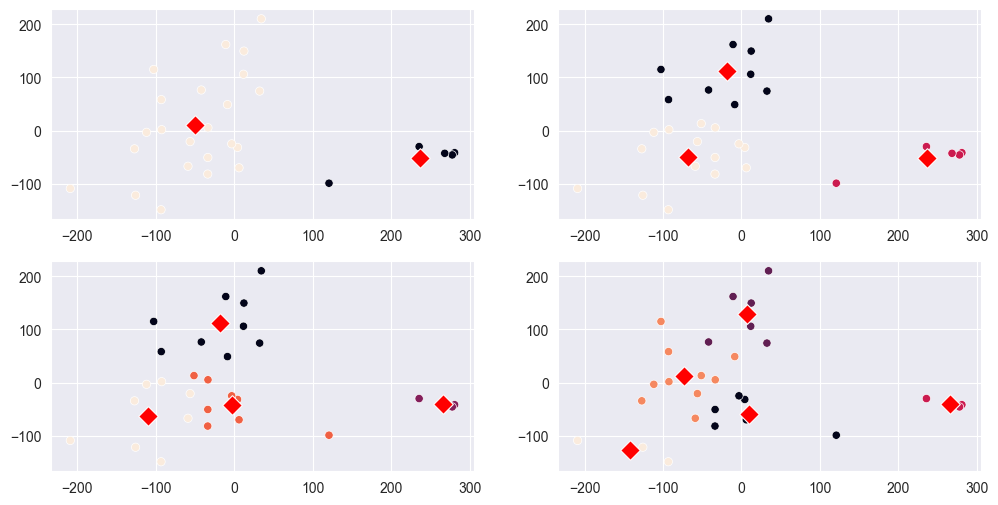

In [14]:
plt.figure(figsize=(12,6))
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(fromage)
    plt.subplot(2, 2, k - 1)
    dim_red = PCA(n_components=2)
    reducted_fromage = dim_red.fit_transform(fromage)
    centers = dim_red.transform(kmeans.cluster_centers_)
    sns.scatterplot(x=reducted_fromage[:, 0], y=reducted_fromage[:, 1], c=kmeans.labels_)
    sns.scatterplot(x=centers[:, 0], y=centers[:, 1], c='r', marker='D', s=100)

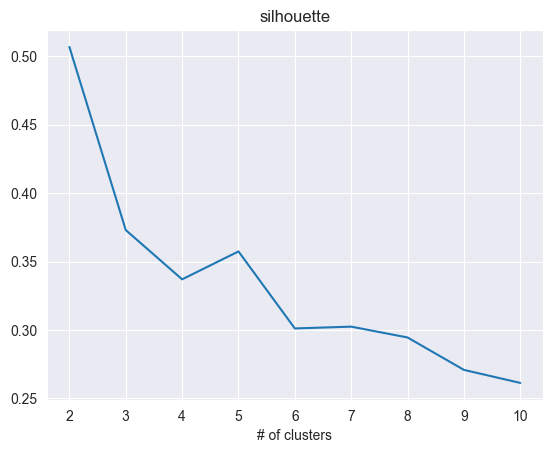

In [8]:
from sklearn import metrics

res = np.arange(9, dtype="double")
for k in np.arange(9):
    km = KMeans(n_clusters=k + 2)
    km.fit(fromage)
    res[k] = metrics.silhouette_score(fromage, km.labels_)
plt.title("silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2, 11, 1), res)
plt.show()

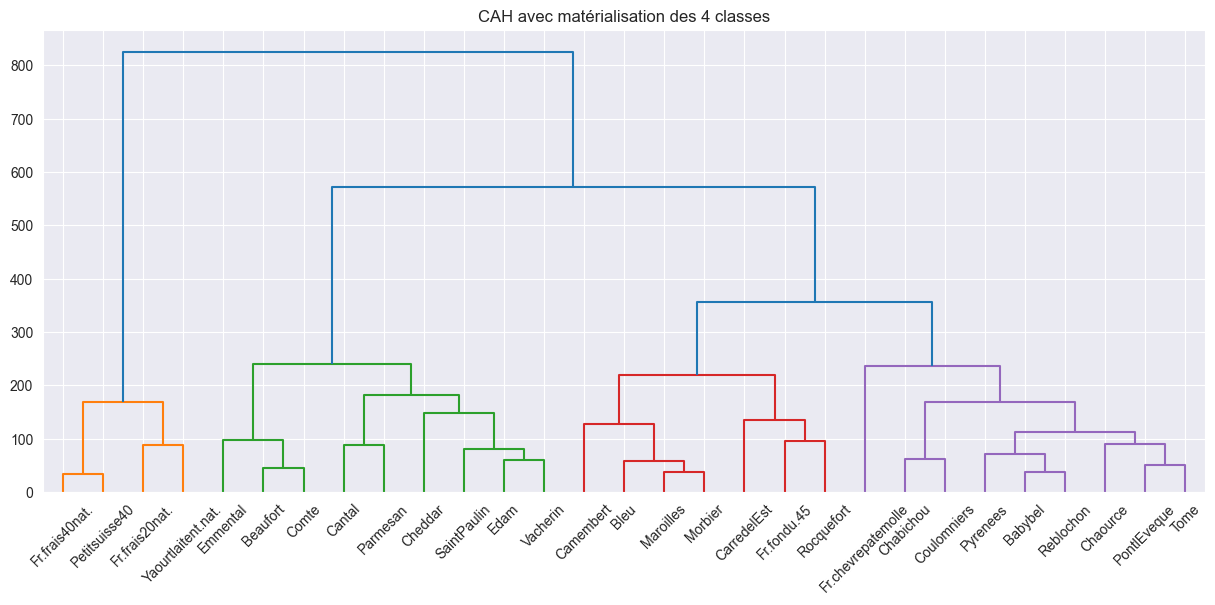

[3 4 2 3 3 2 4 4 2 2 4 2 2 4 3 1 1 3 3 2 1 4 4 4 3 2 4 2 1]
             Fromages
1  Yaourtlaitent.nat.
1       Petitsuisse40
1      Fr.frais40nat.
1      Fr.frais20nat.
2         SaintPaulin
2            Beaufort
2              Cantal
2            Parmesan
2             Cheddar
2               Comte
2                Edam
2            Emmental
2            Vacherin
3          Rocquefort
3             Morbier
3           Maroilles
3         CarredelEst
3           Camembert
3                Bleu
3         Fr.fondu.45
4         Coulomniers
4            Chaource
4           Chabichou
4         PontlEveque
4            Pyrenees
4           Reblochon
4             Babybel
4                Tome
4  Fr.chevrepatemolle


In [9]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

Z = linkage(fromage, method='ward', metric='euclidean')
#affichage du dendrogramme
plt.figure(figsize=(15, 6))
plt.title('CAH avec matérialisation des 4 classes')
dendrogram(Z, labels=fromage.index, orientation='top', color_threshold=250)
plt.show()
groupes_cah = fcluster(Z, t=250, criterion='distance')
print(groupes_cah)
#index triés des groupes
idg = np.argsort(groupes_cah)
#affichage des observations et leurs groupes
print(pd.DataFrame(fromage.index[idg], groupes_cah[idg]))

In [10]:
pd.crosstab(kmeans.labels_, groupes_cah - 1)

col_0,0,1,2,3
row_0,,,,
0,0,6,0,0
1,0,3,4,3
2,4,0,0,0
3,0,0,0,6
4,0,0,3,0


##### AgglomerativeClustering and Scipy fcluster returns the same clustering

In [25]:
from sklearn.cluster import AgglomerativeClustering
cah = AgglomerativeClustering(n_clusters=4,linkage='complete')
fromage_cah = cah.fit_predict(fromage)
pd.crosstab(fromage_cah,groupes_cah - 1)

col_0,0,1,2,3
row_0,,,,
0,0,0,7,6
1,4,0,0,0
2,0,9,0,0
3,0,0,0,3


In [32]:
def divisive_hierarchical_clustering_kmeans(data, n_clusters):
    # Initially, consider all points as one cluster
    kmeans = KMeans(n_clusters=1).fit(data)
    labels = kmeans.labels_
    current_num_clusters = 1

    while current_num_clusters < n_clusters:
        max_cluster = np.argmax(np.bincount(labels))  # Find the cluster with the most points
        print(max_cluster)
        mask = labels == max_cluster  # Create a mask for the selected cluster
        sub_data = data[mask]  # Subset of data belonging to the selected cluster

        # Create a new KMeans model for the selected cluster
        kmeans = KMeans(n_clusters=2).fit(sub_data)
        sub_labels = kmeans.labels_

        # Update labels to reflect the clustering of the selected cluster

        labels[mask] = current_num_clusters + sub_labels # Update labels with new cluster labels
        current_num_clusters += 1  # Update the number of clusters
        print(labels)
    return labels

clustered = divisive_hierarchical_clustering_kmeans(fromage,fromage.shape[0])

0
[1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 1 1 1 2 1 1 1 1 1 1 1 2]
1
[2 2 3 2 2 3 2 2 3 3 2 3 3 2 2 2 2 2 2 3 2 2 2 2 2 3 2 3 2]
2
[3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 4 4 3 3 3 4 3 3 3 3 3 3 3 4]
3
[5 5 4 5 5 4 5 5 4 4 5 4 4 4 5 4 4 5 5 4 4 5 5 5 5 4 5 4 4]
5
[5 6 4 5 5 4 6 6 4 4 6 4 4 4 5 4 4 5 6 4 4 6 6 6 5 4 6 4 4]
4
[5 6 7 5 5 7 6 6 7 7 6 7 7 6 5 6 6 5 6 7 6 6 6 6 5 7 6 7 6]
6
[5 8 7 5 5 7 8 8 7 7 8 7 7 7 5 7 7 5 8 7 7 8 8 8 5 7 8 7 7]
7
[5 8 8 5 5 8 8 8 8 8 8 8 8 9 5 9 9 5 8 8 9 8 8 8 5 8 8 8 9]
8
[ 5  9 10  5  5 10  9  9 10 10  9 10 10  9  5  9  9  5  9 10  9  9  9  9
  5 10  9 10  9]
9
[ 5 10 10  5  5 10 10 10 10 10 10 10 10 11  5 11 11  5 10 10 11 10 10 10
  5 10 10 10 11]
10
[ 5 12 11  5  5 11 12 12 11 11 12 11 11 11  5 11 11  5 12 11 11 12 12 12
  5 11 12 11 11]
11
[ 5 12 12  5  5 12 12 12 12 12 12 12 12 13  5 13 13  5 12 12 13 12 12 12
  5 12 12 12 13]
12
[ 5 14 13  5  5 13 14 14 13 13 14 13 13 13  5 13 13  5 14 13 13 14 14 14
  5 13 14 13 13]
13
[ 5 14 15  5  5 15 14 14 15 15 14 15 1